In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib import collections  as mc

In [2]:
# read csv
df = pd.read_csv("kubrick.csv")
# trim whitespace from around the column names
df.columns = [col.strip() for col in list(df.columns)]

# Convert year strings (e.g. 2014) to datetime
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')

In [3]:
df = df.sort_values(by=['Year', 'Title'])

In [4]:
df.head()

,Year,Title
0,1951-01-01,Day of the Fight
1,1951-01-01,Flying Padre
2,1953-01-01,Fear and Desire
3,1953-01-01,The Seafarers
4,1955-01-01,Killer's Kiss


In [5]:
from scale import TimeScale
options = {
        "initialWidth": 112,
        "initialHeight": 1000,
        "scale": TimeScale(),
        "direction": "right",
        "dotColor": "#000000",
        "labelBgColor": "#aaaaaa",
        "linkColor": "#ff0000",
        "labelPadding": {"left": 0, "right": 0, "top": 5, "bottom": 5},
        "labella": {
            "minPos": 0,
            "maxPos": 960,
            "nodeHeight": 10,
        },
        "showTicks": False,
        "latex": {"reproducible": True}
    }

In [6]:
# import the modified Labella.py timeline
import timeline

In [7]:
df['time'] = df['Year']
df['text'] = df['Title']
ts = df.to_dict('records')
tl = timeline.Timeline(ts, options=options)
fc = tl.forceCompute()

In [8]:
htz = [float(f.idealPos) for f in fc]
yrz = [float(f.currentPos) for f in fc]

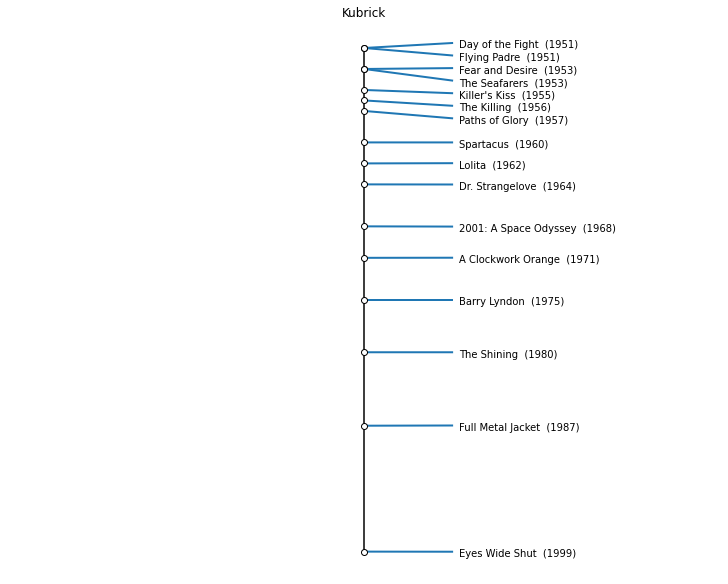

In [9]:
rightOffset = 200

# Create figure and plot a stem plot with the date
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html
fig, ax = plt.subplots(figsize=(10, 8), constrained_layout=True)
ax.set(title="Kubrick")

ax.plot(np.zeros_like(df['Year']), htz, "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, y, r in zip(yrz, pd.to_datetime(df['Year']), df['Title']):
    ax.annotate(r + " (" + y.strftime("%Y") + ")", xy=(rightOffset, d),
                xytext=(6, 3), textcoords="offset points",
                horizontalalignment="left",
                verticalalignment="top")
# invert y axis
ax.invert_yaxis()

# # remove y axis and spines
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


lines = np.stack((np.array([np.zeros_like(df['Year']), htz]).transpose(),
                   np.array([np.full_like(df['Year'], rightOffset), yrz]).transpose()), axis=1)
lines
lc = mc.LineCollection(lines, linewidths=2)
ax.add_collection(lc)

plt.show()